<a href="https://www.kaggle.com/code/kapturovalexander/students-in-rooms-with-postgresql?scriptVersionId=162282508" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

![](https://www.casita.com/images/files/public/26112019083301AM-students-studying-together-in-their-student-accommodation.jpg)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-in-rooms/rooms.csv
/kaggle/input/students-in-rooms/query3_results.xml
/kaggle/input/students-in-rooms/query1_results.xml
/kaggle/input/students-in-rooms/query4_results.xml
/kaggle/input/students-in-rooms/query3_results.json
/kaggle/input/students-in-rooms/query2_results.xml
/kaggle/input/students-in-rooms/query4_results.json
/kaggle/input/students-in-rooms/students.json
/kaggle/input/students-in-rooms/rooms.json
/kaggle/input/students-in-rooms/query_1_result.csv
/kaggle/input/students-in-rooms/query1_results.json
/kaggle/input/students-in-rooms/query2_results.json
/kaggle/input/students-in-rooms/students.csv


# <span style="color: red; border-bottom: 8px solid orange; padding-left: 15px; background-color: yellow; padding-right: 15px;">🎓 1. List of rooms and number of students in each room</span>

```SQL
SELECT
	rooms.name AS room_number,
	COUNT(students.id) AS residents
FROM
	rooms
	INNER JOIN students ON
		rooms.id = students.room
GROUP BY
	rooms.name;
```

# <span style="color: red; border-bottom: 8px solid orange; padding-left: 15px; background-color: yellow; padding-right: 15px;">🛌🏻 2. 5 rooms with the smallest average student age</span>

```SQL
SELECT
    rooms.name,
    AVG(
        AGE(CURRENT_DATE, students.birthday)
    ) AS average_age
FROM
	rooms
	INNER JOIN students ON
		rooms.id = students.room
GROUP BY
	rooms.name
ORDER BY
    average_age ASC
LIMIT
    5;
```

![](https://housing.fiu.edu/_assets/images/student-room-friends.jpg)

# <span style="color: red; border-bottom: 8px solid orange; padding-left: 15px; background-color: yellow; padding-right: 15px;">👩‍🦲 3. 5 rooms with the biggest difference in student age</span>

```SQL
SELECT
    rooms.name,
    MAX(AGE(CURRENT_DATE, students.birthday)) - MIN(AGE(CURRENT_DATE, students.birthday)) 
		AS age_difference
FROM
	rooms
	INNER JOIN students ON
		rooms.id = students.room
GROUP BY
	rooms.name
ORDER BY
    age_difference DESC
LIMIT
    5;
```

# <span style="color: red; border-bottom: 8px solid orange; padding-left: 15px; background-color: yellow; padding-right: 15px;">👨‍🦱 4. List of rooms where both boys and girls have been living</span>

```SQL
SELECT
	rooms.name AS room_number		
FROM
	rooms
	INNER JOIN students ON
		rooms.id = students.room
GROUP BY
	rooms.name
HAVING
	COUNT(DISTINCT students.sex) = 2;
```

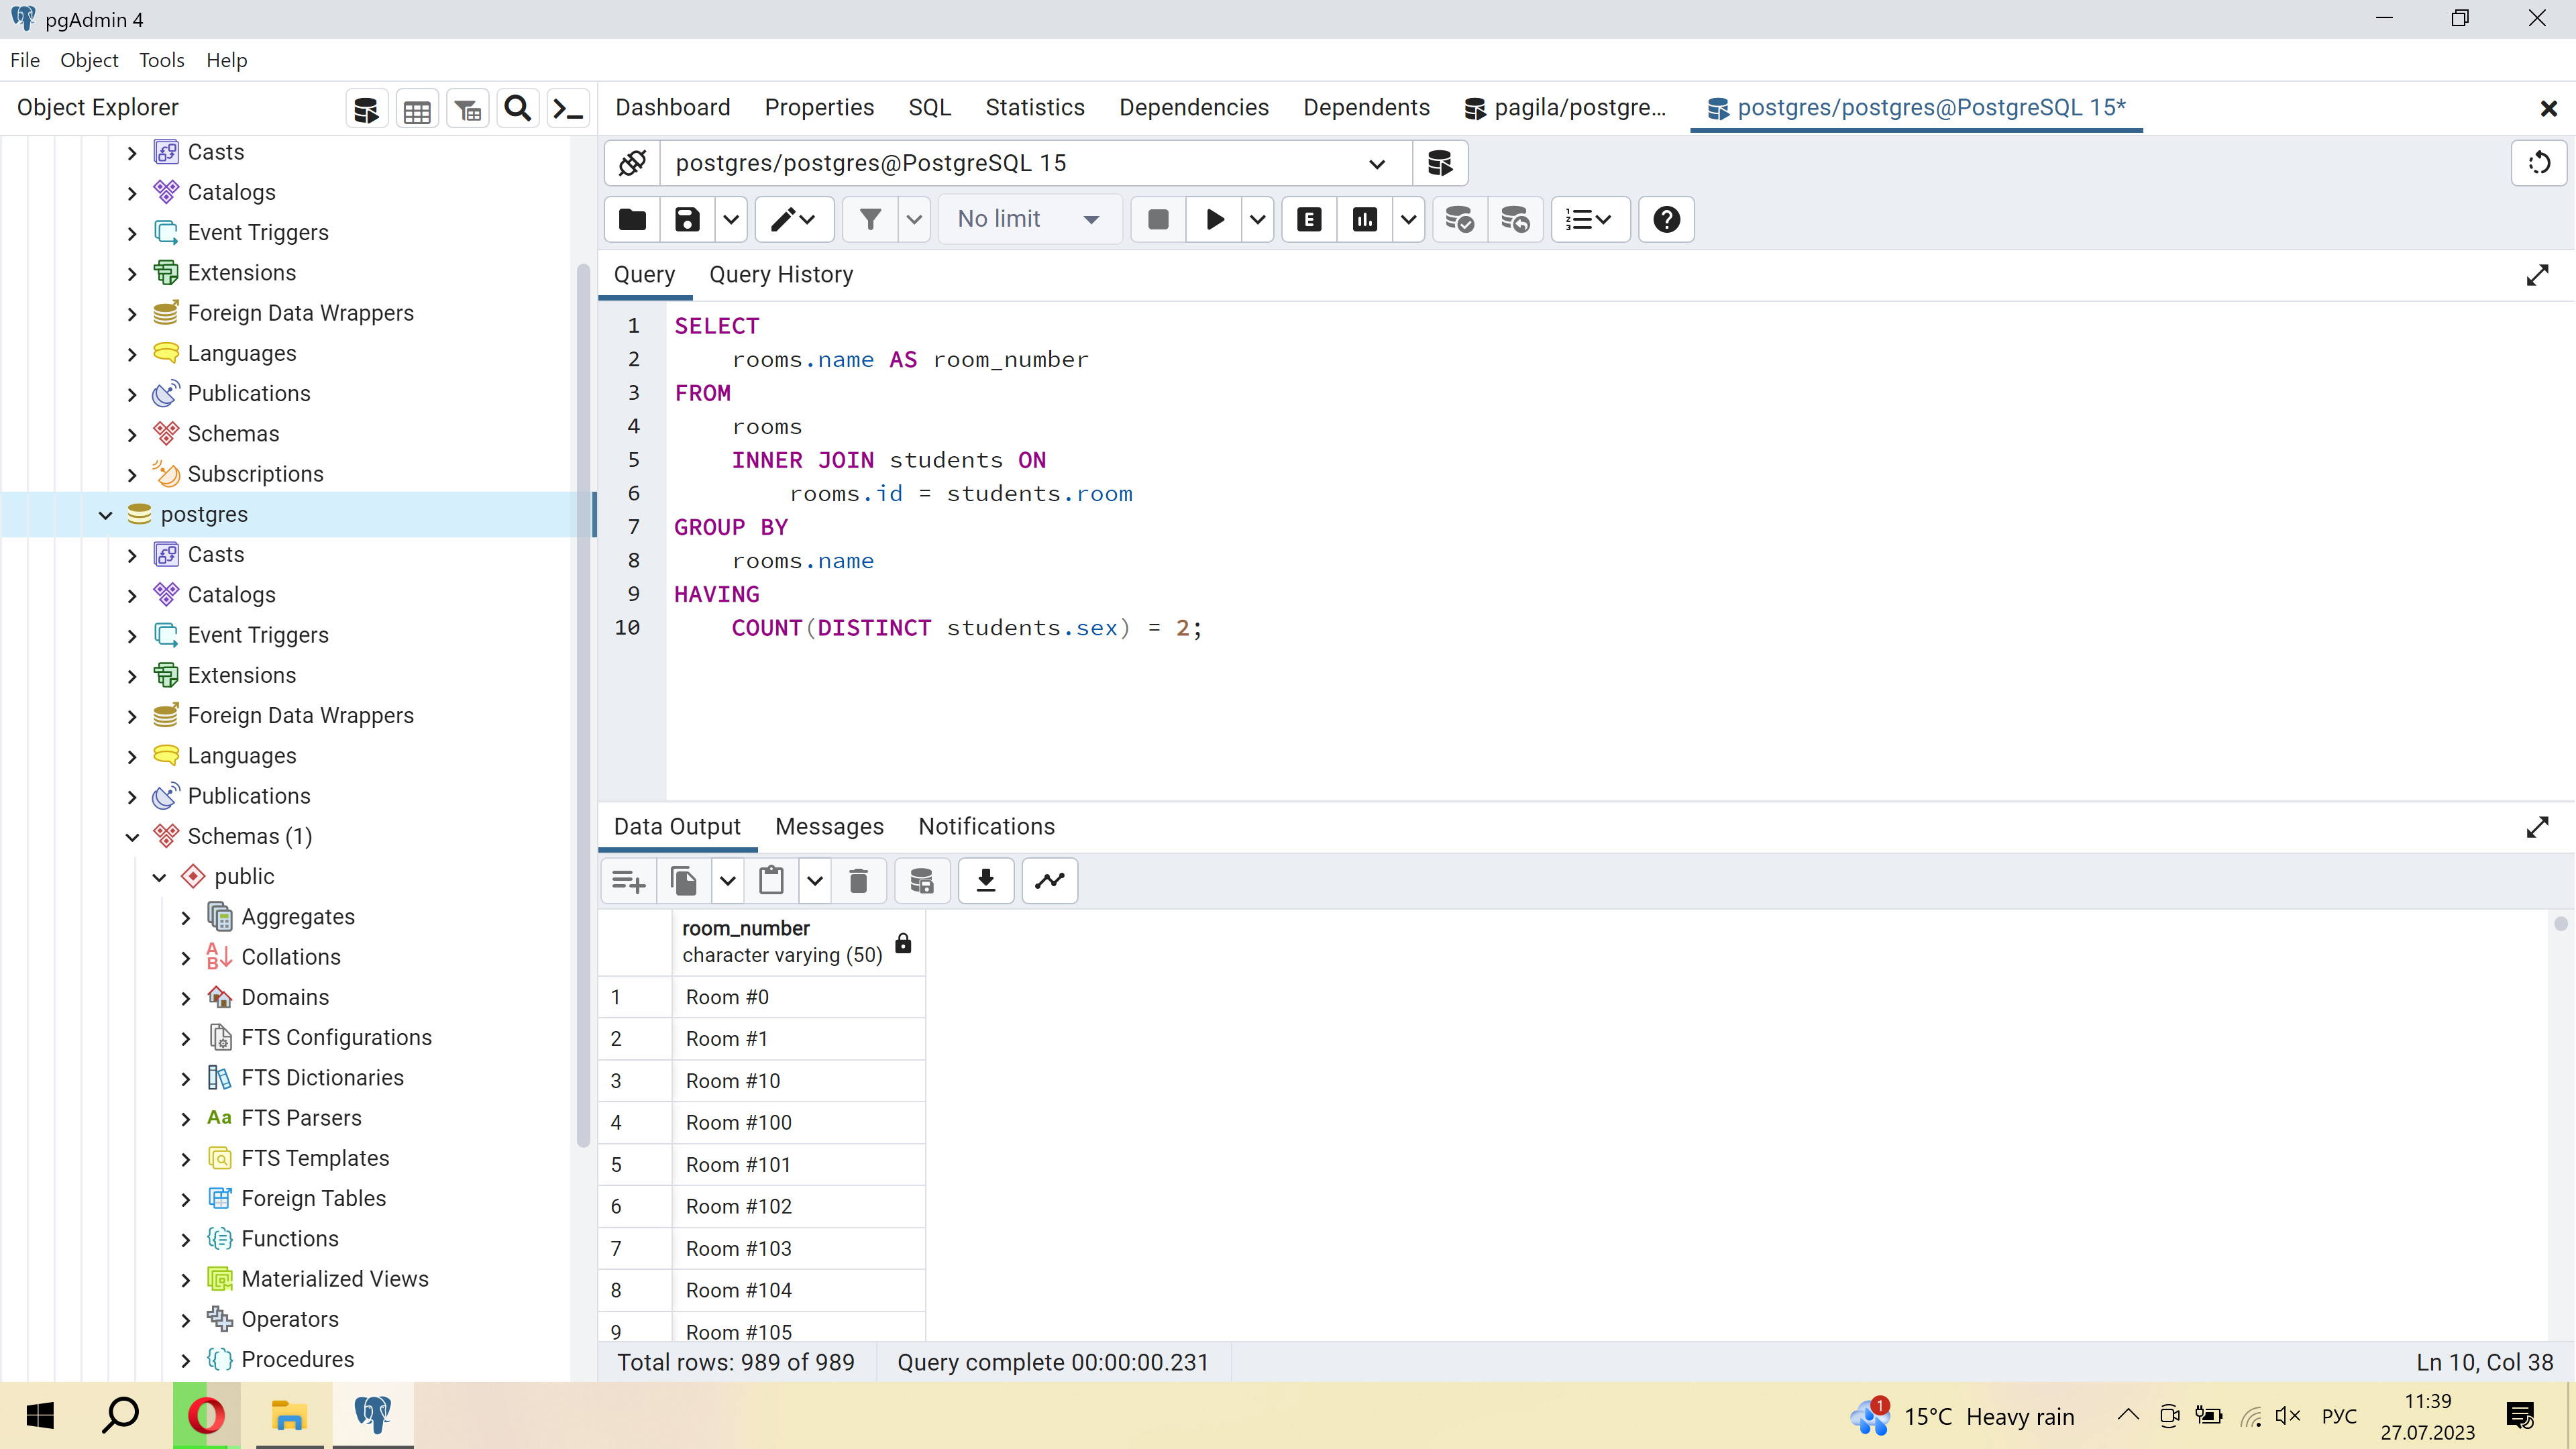

# <span style="color: red; border-bottom: 8px solid orange; padding-left: 15px; background-color: yellow; padding-right: 15px;">Thank You for Your attention dear Friends!!!</span>